### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第18天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/03/17
### 改版日期:  
### 改版備註:

# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### ANS:

In [6]:
# 先來看看 'DAYS_BIRTH' 的統計描述吧 (pandas.describe())
print("Correlation between TARGET and DAYS_BIRTH", app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

Correlation between TARGET and DAYS_BIRTH -0.07823930830982712


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [7]:
import pprint
#列印出DAYS_BIRTH
pprint.pprint(app_train['DAYS_BIRTH'])

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64


In [8]:
# 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
import math
col_name_source = 'DAYS_BIRTH'
col_name_dest = 'DAYS_BIRTH_YEARLY'
app_train[col_name_dest] =  app_train[col_name_source]/365
pprint.pprint('app_train[{0}]內容:'.format(col_name_dest))
pprint.pprint(app_train[col_name_dest])
#列印出最大最小值
col_name_dest_max = app_train[col_name_dest].max()
col_name_dest_min = app_train[col_name_dest].min()
pprint.pprint('----------------------------------------')
pprint.pprint('max age is {0},min age is {1}'.format(col_name_dest_max,col_name_dest_min))
pprint.pprint('----------------------------------------')
#觀察劃分下,每種組距各出現幾次
bin_cut = np.arange(math.floor(col_name_dest_min),math.ceil(col_name_dest_max),1)
pprint.pprint(bin_cut)
pprint.pprint('----------------------------------------')
app_train[col_name_dest] = pd.cut(app_train[col_name_dest],bins=bin_cut)
pprint.pprint('app_train[{0}]每種組距各出現幾次:'.format(col_name_dest))
pprint.pprint(app_train[col_name_dest].value_counts())

'app_train[DAYS_BIRTH_YEARLY]內容:'
0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH_YEARLY, Length: 307511, dtype: float64
'----------------------------------------'
'max age is 69.12054794520547,min age is 20.517808219178082'
'----------------------------------------'
array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])
'----------------------------------------'
'app_train[DAYS_BIRTH_YEARLY]每種組距各出現幾次:'
(38, 39]    8884
(37, 38]    8798
(39, 40]    8767
(36, 37]    8623
(40, 41]    8618
(27, 28]    8485
(41, 42]    8455
(31, 32]    8372
(43, 44]    8312
(42, 43]    8203
(28, 29]    7971
(32, 33]    7909
(44, 45]    7818
(30, 31]    7816

                     TARGET
DAYS_BIRTH_YEARLY          
(20, 21]           0.000000
(21, 22]           0.113402
(22, 23]           0.136720
(23, 24]           0.128452
(24, 25]           0.110287
(25, 26]           0.101102
(26, 27]           0.104190
(27, 28]           0.119151
(28, 29]           0.111906
(29, 30]           0.112342
(30, 31]           0.110287
(31, 32]           0.106785
(32, 33]           0.095082
(33, 34]           0.101491
(34, 35]           0.100157
(35, 36]           0.095177
(36, 37]           0.094979
(37, 38]           0.089338
(38, 39]           0.085772
(39, 40]           0.082582
(40, 41]           0.080645
(41, 42]           0.081727
(42, 43]           0.073632
(43, 44]           0.074832
(44, 45]           0.081607
(45, 46]           0.076720
(46, 47]           0.075679
(47, 48]           0.071612
(48, 49]           0.073447
(49, 50]           0.073215
(50, 51]           0.070623
(51, 52]           0.069110
(52, 53]           0.069826
(53, 54]           0

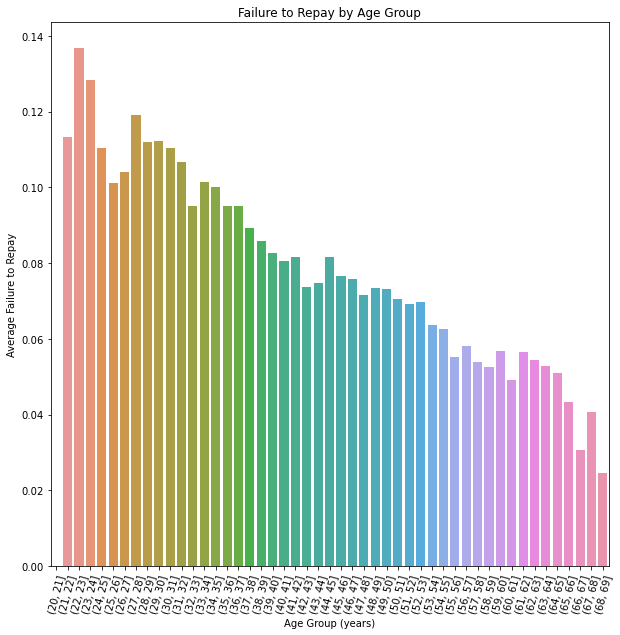

In [12]:
# 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
import seaborn as sns
plt.figure(figsize = (10, 10))
data_draw = pd.DataFrame(app_train[['DAYS_BIRTH_YEARLY','TARGET']])
age_groups  = data_draw.groupby('DAYS_BIRTH_YEARLY').mean()
print(age_groups)
px = age_groups.index.astype(str)
py = age_groups['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

### 可以非常明顯地看出趨勢，越年輕的客戶族群的違約遲繳的可能越大！